In [1]:
from keras.models import Sequential  
from keras.layers import Dense, Flatten
from collections import deque 
import numpy as np
import gym 
env = gym.make('MountainCar-v0')  
import random

In [129]:
model = Sequential()
model.add(Dense(20, input_shape=(2,) + env.observation_space.shape, kernel_initializer='uniform', activation='relu'))
model.add(Flatten())       # Flatten input so as to have no problems with processing
model.add(Dense(18, kernel_initializer='uniform', activation='relu'))
model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(env.action_space.n, kernel_initializer='uniform', activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [138]:
D = deque()
observetime = 800
epsilon = 0.7
gamma = 0.9
mb_size = 50
# Statistics to save
timesFinished = 0
rewardTrack =[]
maxVel=0
maxPos=0

In [150]:
observation = env.reset() 
obs = np.expand_dims(observation, axis=0) 
state = np.stack((obs, obs), axis=1)
done = False
maxReward = 0
epochs = 9

for epoch in range(epochs):
    D = deque()
    for t in range(observetime):
        env.render()
        if(((t/observetime)*100)%5 == 0):
            print("{}%".format(100*t/observetime))
        if (t==observetime/2):
            print("Half")
        if np.random.rand() <= epsilon:
            action = np.random.randint(0, env.action_space.n, size=1)[0]
#             epsilon*=0.95
        else:
            Q = model.predict(state)
            action = np.argmax(Q)
        observation_new, reward, done, info = env.step(action)

        if max(abs(state[0][1])) > maxVel:
    #         print("New Vel")

            maxVel = max(abs(state[0][1]))
            print(maxVel)
            reward += 10

        if max(state[0][0]) > maxPos:
    #         print("New Pos")
            reward += 30
            maxPos = max(state[0][0])
            print(maxPos)
    #     print(reward) 
        if reward > maxReward:
            print(reward)
            maxReward = reward
        obs_new = np.expand_dims(observation_new, axis=0)          
        state_new = np.append(np.expand_dims(obs_new, axis=0), state[:, :1, :], axis=1)     
        D.append((state, action, reward, state_new, done))         
        state = state_new         
        if done:
            maxVel=0
            maxPos=0
            env.reset()           
            obs = np.expand_dims(observation, axis=0)      
            state = np.stack((obs, obs), axis=1)
    print('Observing Finished')

    # mb_size = 250

    for iteration in range (3):
        minibatch = random.sample(D, mb_size)                              
        inputs_shape = (mb_size,) + state.shape[1:]
        inputs = np.zeros(inputs_shape)
        targets = np.zeros((mb_size, env.action_space.n))
        print(iteration)
        for i in range(0, mb_size):
            if(((i/mb_size)*100)%50 == 0):
                print("{}%".format(100*i/mb_size))
            state = minibatch[i][0]
            action = minibatch[i][1]
            reward = minibatch[i][2]
            state_new = minibatch[i][3]
            done = minibatch[i][4]
            inputs[i:i+1] = np.expand_dims(state, axis=0)
            targets[i] = model.predict(state)
            Q_sa = model.predict(state_new)

            if done:
                targets[i, action] = reward
            else:
                targets[i, action] = reward + gamma * np.max(Q_sa)

            model.train_on_batch(inputs, targets)
    print('Learning Finished')

0.0%
5.0%
10.0%
15.0%
20.0%
25.0%
0.5254395243772244
9.0
0.5261465312627455
0.5279953198687241
0.52981113534873
0.5315803608278178
0.5332897301378358
0.5349264275272483
0.5364781838782997
0.5379333687002428
0.5392810772075097
0.5405112118371346
0.5416145576095304
0.5425828507899623
0.5434088403638635
0.5440863418967272
0.5446102834079917
0.5449767429475761
0.5451829776231192
0.5452274438852629
0.0001176349478659166
39.0
0.00027885574228623996
0.0004379894158342018
30.0%
0.0005938446939501148
0.0007452545553087835
0.0008910848940988802
0.0010302429628931246
0.0011616855367478664
0.0012844267391675446
0.0013975454708865995
0.0015001923832046907
0.001591596339001603
0.0016710703066816668
0.0017380166352538478
0.0017919316626085395
0.001832409613830344
0.001859145752067717
0.001871938750999294
35.0%
40.0%
0.0018731162219036376
45.0%
0.545230229658209
50.0%
Half
0.5254395243772244
0.5260176083364803
0.5277722237496271
0.5294955391194146
0.5311746310694712
0.5327969089949296
0.53435020967448

In [151]:
observation = env.reset()
obs = np.expand_dims(observation, axis=0)
state = np.stack((obs, obs), axis=1)
done = False
tot_reward = 0.0
while not done:
    env.render()
    Q = model.predict(state)        
    action = np.argmax(Q)         
    observation, reward, done, info = env.step(action)
    obs = np.expand_dims(observation, axis=0)
    state = np.append(np.expand_dims(obs, axis=0), state[:, :1, :], axis=1)    
    tot_reward += reward
    rewardTrack.append(tot_reward)
print('Game ended! Total reward: {}'.format(tot_reward))

Game ended! Total reward: -200.0


In [152]:
env.close()

In [149]:
model.save('PixelDLA')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: PixelDLA/assets


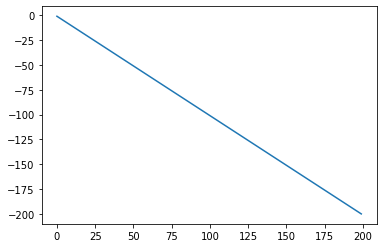

In [121]:
import matplotlib.pyplot as plt
plt.plot(range(len(rewardTrack)), rewardTrack)
plt.show()